In [1]:
# -*- coding: utf-8 -*-
"""
importing two modules
"""
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ideal_w():
    """
    calculates the ideal weights and returns the array
    """
    global w0, w1, w2
    w0 = np.random.uniform(-0.25, 0.25)
    w1 = np.random.uniform(-1, 1)
    w2 = np.random.uniform(-1, 1)
    W = np.array((w0, w1, w2)).reshape((1, 3))
    print("\nThe weights w0, w1, w2 picked are:")
    print("w0 = {0}\nw1 = {1}\nw2 = {2}\n".format(w0, w1, w2))
    return W

In [3]:
def set_S():
    """
    assigning values uniformly at random to the Set S for 100 as well as 1000 inputs
    """
    S_100 = np.empty((100, 2))
    for row in range(np.shape(S_100)[0]):
        S_100[row] = np.random.uniform(-1, 1, 2)
    S_1000 = np.empty((1000, 2))
    for row in range(np.shape(S_1000)[0]):
        S_1000[row] = np.random.uniform(-1, 1, 2)
    return (S_100, S_1000)

In [4]:
def initial_w():
    """
    calculates weights w'
    """
    global w0_prime, w1_prime, w2_prime
    w0_prime = np.random.uniform(-1, 1)
    w1_prime = np.random.uniform(-1, 1)
    w2_prime = np.random.uniform(-1, 1)
    print("The weights w0', w1', w2' picked are:")
    print("w0' = {0}\nw1' = {1}\nw2' = {2}\n".format(w0_prime, w1_prime, w2_prime))

In [5]:
def subset_S0_S1(S, W, n):
    """
    creating sub-sets S0 and S1 and plotting the classifier
    """
    print("\nFor N =", n)
    global bias, S0, S1
    bias = np.array((1))
    S0 = np.empty((0, 2))
    S1 = np.empty((0, 2))

    for row in range(np.shape(S)[0]):
        if np.dot(np.append(bias, S[row]), W.T) < 0:
            S0 = np.append(S0, S[row].reshape((1, 2)), axis = 0)
        else:
            S1 = np.append(S1, S[row].reshape((1, 2)), axis = 0)
    plt.scatter(*zip(*S0), marker = 'x', color = 'r', label = 'S0')
    plt.scatter(*zip(*S1), marker = '.', color = 'b', label = 'S1')

    x1 = np.linspace(-1.1, 1.6)
    x2 = - (W[0][1]*x1 + W[0][0]) / W[0][2]
    plt.ylim(-1.1, 1.1)
    plt.plot(x1, x2, label = 'Classifier', color ='g')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

In [6]:
def pta(S):
    """
    performs the perceptron training algorithm
    """
    eta_list = [1, 10, 0.1]

    for eta in eta_list:
        W_prime = np.array((w0_prime, w1_prime, w2_prime)).reshape((1, 3))
        print("-----------------------------------------------------------------------")
        print("For eta:", eta)
        epoch = 0
        no_misclassifications = 0
        misclassifications_list = []

        while True:
            no_misclassifications = 0
            epoch += 1
            for row in range(np.shape(S)[0]):
                if np.dot(np.append(bias, S[row]), W_prime.T) < 0:
                    if S[row] in S0:
                        continue
                    else:
                        no_misclassifications += 1
                        W_prime = W_prime + eta*np.append(bias, S[row])
                else:
                    if S[row] in S1:
                        continue
                    else:
                        no_misclassifications += 1
                        W_prime = W_prime - eta*np.append(bias, S[row])
            misclassifications_list.append(no_misclassifications)
            if no_misclassifications == 0:
                break
            else:
                continue
        print("Total number of epochs:", epoch, "\n")
        print("The final weights are :")
        print("w0 = {0}\nw1 = {1}\nw2 = {2}\n".format(W_prime[0][0], W_prime[0][1], W_prime[0][2]))
        print("Difference between these weights and the optimal weights are:")
        print("w0 difference: {0}\nw1 difference: {1}\nw2 difference: {2}\n".format(W_prime[0][0] - w0, W_prime[0][1] - w1, W_prime[0][2] - w2))

        plt.plot(range(epoch), misclassifications_list)
        plt.xlabel("Number of epochs")
        plt.ylabel("Number of misclassifications")
        plt.show()

In [7]:
W = ideal_w()


The weights w0, w1, w2 picked are:
w0 = -0.03729555595314771
w1 = -0.5285360793661733
w2 = -0.0035228688815747145



In [8]:
S_100, S_1000 = set_S()
initial_w()

The weights w0', w1', w2' picked are:
w0' = -0.76230314293832
w1' = -0.9778496870589024
w2' = -0.9137294683644481




For N = 100


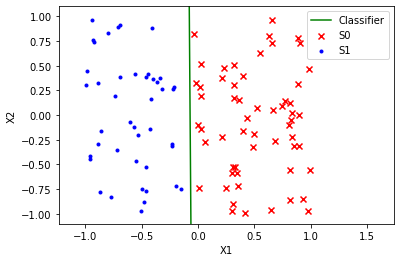

In [9]:
subset_S0_S1(S_100, W, 100)

-----------------------------------------------------------------------
For eta: 1
Total number of epochs: 5 

The final weights are :
w0 = -0.76230314293832
w1 = -4.8144721744775705
w2 = -0.536293247397337

Difference between these weights and the optimal weights are:
w0 difference: -0.7250075869851723
w1 difference: -4.285936095111397
w2 difference: -0.5327703785157623



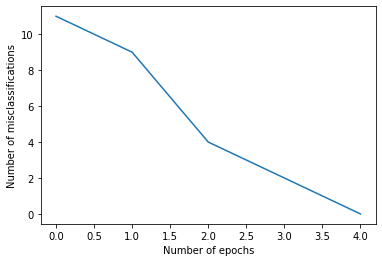

-----------------------------------------------------------------------
For eta: 10
Total number of epochs: 26 

The final weights are :
w0 = -10.76230314293832
w1 = -78.27619111507273
w2 = 1.3074496986998385

Difference between these weights and the optimal weights are:
w0 difference: -10.725007586985173
w1 difference: -77.74765503570656
w2 difference: 1.3109725675814132



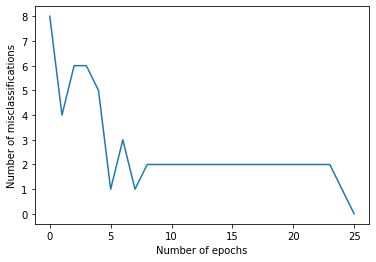

-----------------------------------------------------------------------
For eta: 0.1
Total number of epochs: 5 

The final weights are :
w0 = -0.16230314293832013
w1 = -1.3410699659359497
w2 = -0.23350760385399805

Difference between these weights and the optimal weights are:
w0 difference: -0.12500758698517242
w1 difference: -0.8125338865697764
w2 difference: -0.22998473497242333



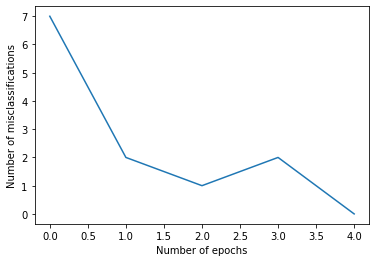

In [10]:
pta(S_100)


For N = 1000


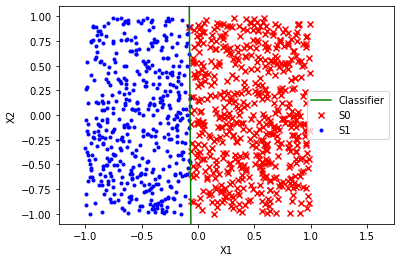

In [11]:
subset_S0_S1(S_1000, W, 1000)

-----------------------------------------------------------------------
For eta: 1
Total number of epochs: 68 

The final weights are :
w0 = -1.76230314293832
w1 = -24.68046250193162
w2 = -0.18697996544064854

Difference between these weights and the optimal weights are:
w0 difference: -1.7250075869851722
w1 difference: -24.151926422565445
w2 difference: -0.18345709655907383



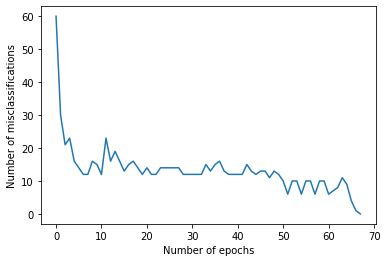

-----------------------------------------------------------------------
For eta: 10
Total number of epochs: 133 

The final weights are :
w0 = -20.762303142938322
w1 = -287.684002669226
w2 = -2.1246252186979726

Difference between these weights and the optimal weights are:
w0 difference: -20.725007586985175
w1 difference: -287.1554665898598
w2 difference: -2.1211023498163977



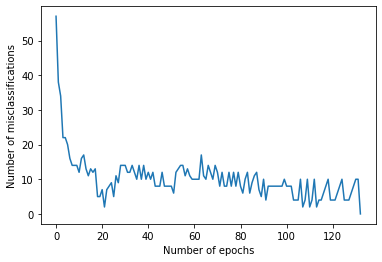

-----------------------------------------------------------------------
For eta: 0.1
Total number of epochs: 40 

The final weights are :
w0 = -0.16230314293832013
w1 = -2.2628849461304186
w2 = -0.01783045114046386

Difference between these weights and the optimal weights are:
w0 difference: -0.12500758698517242
w1 difference: -1.7343488667642453
w2 difference: -0.014307582258889145



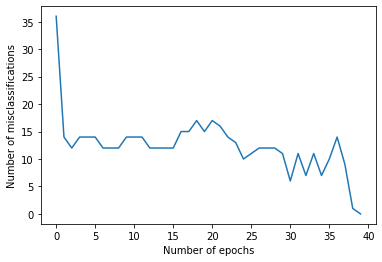

In [12]:
pta(S_1000)

# Question (n)
### Comment on how the changes in η effect the number of epochs needed until convergence.

#### Since we are taking the weight values uniformly at random and S is also uniformly at random, hence, we cannot as such find any correlation between eta and the number of epochs. Sometimes the weights may be close to the optimal weights, and so eta = 0.1 will benefit, but if the weights are far away, the larger learning rate may converge in lesser epochs or may even overshoot as seen for various runs.

# Question (o)
### Comment on whether we would get the exact same results (in terms of the effects of η on training performance) if we had started with different w0, w1, w2, S, w′0, w′1, w′2.

#### Since our weights and input S are anyways random, again, we cannot determine the effect of learning rate on the training performance. We cannot show any correlation.

# Question (p)
### Comment on the differences compared to n = 100.

#### When the input size n increases, we see an increase in the number of misclassifications. Hence it takes more updations in weights when the input size increases. In short, we can say that there is a positive correlation between the size n, and the number of misclassifications and number of epochs.